In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('alzheimers_disease_data.csv', sep=',')
# suppression des colonnes d'identification du patient et du médecin traitant, inutile pour le développement d'un modèle
df = df.drop(columns=['PatientID', 'DoctorInCharge'])
df[['MMSE']]

,MMSE
0,21.463532
1,20.613267
2,7.356249
3,13.991127
4,13.517609
...,...
2144,1.201190
2145,6.458060
2146,17.011003
2147,4.030491


In [61]:
df.dtypes

Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
ADL                          float64
C

<h2>Demographic Details</h2>
<ul>
<li>Age: The age of the patients ranges from 60 to 90 years.</li>
<li>Gender: Gender of the patients, where 0 represents Male and 1 represents Female.</li>
<li>Ethnicity: The ethnicity of the patients, coded as follows:
0: Caucasian
1: African American
2: Asian
3: Other</li>
<li>EducationLevel: The education level of the patients, coded as follows:
0: None
1: High School
2: Bachelor's
3: Higher</li>
</ul>
<h2>Lifestyle Factors</h2>
<ul>
<li>BMI: Body Mass Index of the patients, ranging from 15 to 40.</li>
<li>Smoking: Smoking status, where 0 indicates No and 1 indicates Yes.</li>
<li>AlcoholConsumption: Weekly alcohol consumption in units, ranging from 0 to 20.</li>
<li>PhysicalActivity: Weekly physical activity in hours, ranging from 0 to 10.</li>
<li>DietQuality: Diet quality score, ranging from 0 to 10.</li>
<li>SleepQuality: Sleep quality score, ranging from 4 to 10.</li>
</ul>
<h2>Medical History</h2>
<ul>
<li>FamilyHistoryAlzheimers: Family history of Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.</li>
<li>CardiovascularDisease: Presence of cardiovascular disease, where 0 indicates No and 1 indicates Yes.</li>
<li>Diabetes: Presence of diabetes, where 0 indicates No and 1 indicates Yes.</li>
<li>Depression: Presence of depression, where 0 indicates No and 1 indicates Yes.</li>
<li>HeadInjury: History of head injury, where 0 indicates No and 1 indicates Yes.</li>
<li>Hypertension: Presence of hypertension, where 0 indicates No and 1 indicates Yes.</li>
</ul>
<h2>Clinical Measurements</h2>
<ul>
<li>SystolicBP: Systolic blood pressure, ranging from 90 to 180 mmHg.</li>
<li>DiastolicBP: Diastolic blood pressure, ranging from 60 to 120 mmHg.</li>
<li>CholesterolTotal: Total cholesterol levels, ranging from 150 to 300 mg/dL.</li>
<li>CholesterolLDL: Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.</li>
<li>CholesterolHDL: High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.</li>
<li>CholesterolTriglycerides: Triglycerides levels, ranging from 50 to 400 mg/dL.</li>
</ul>
<h2>Cognitive and Functional Assessments</h2>
<ul>
<li>MMSE: Mini-Mental State Examination score, ranging from 0 to 30. Lower scores indicate cognitive impairment.</li>
<li>FunctionalAssessment: Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.</li>
<li>MemoryComplaints: Presence of memory complaints, where 0 indicates No and 1 indicates Yes.</li>
<li>BehavioralProblems: Presence of behavioral problems, where 0 indicates No and 1 indicates Yes.</li>
<li>ADL: Activities of Daily Living score, ranging from 0 to 10. Lower scores indicate greater impairment.</li>
</ul>
<h2>Symptoms</h2>
<ul>
<li>Confusion: Presence of confusion, where 0 indicates No and 1 indicates Yes.</li>
<li>Disorientation: Presence of disorientation, where 0 indicates No and 1 indicates Yes.</li>
<li>PersonalityChanges: Presence of personality changes, where 0 indicates No and 1 indicates Yes.</li>
<li>DifficultyCompletingTasks: Presence of difficulty completing tasks, where 0 indicates No and 1 indicates Yes.</li>
<li>Forgetfulness: Presence of forgetfulness, where 0 indicates No and 1 indicates Yes.</li>
</ul>
<h2>Diagnosis Information</h2>
<ul>
<li>Diagnosis: Diagnosis status for Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.</li>
</ul>

In [62]:
df.dtypes

Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
ADL                          float64
C

In [63]:
df.isna().sum()
# pas de colonne présentant des valeurs nulles

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

In [64]:
df.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


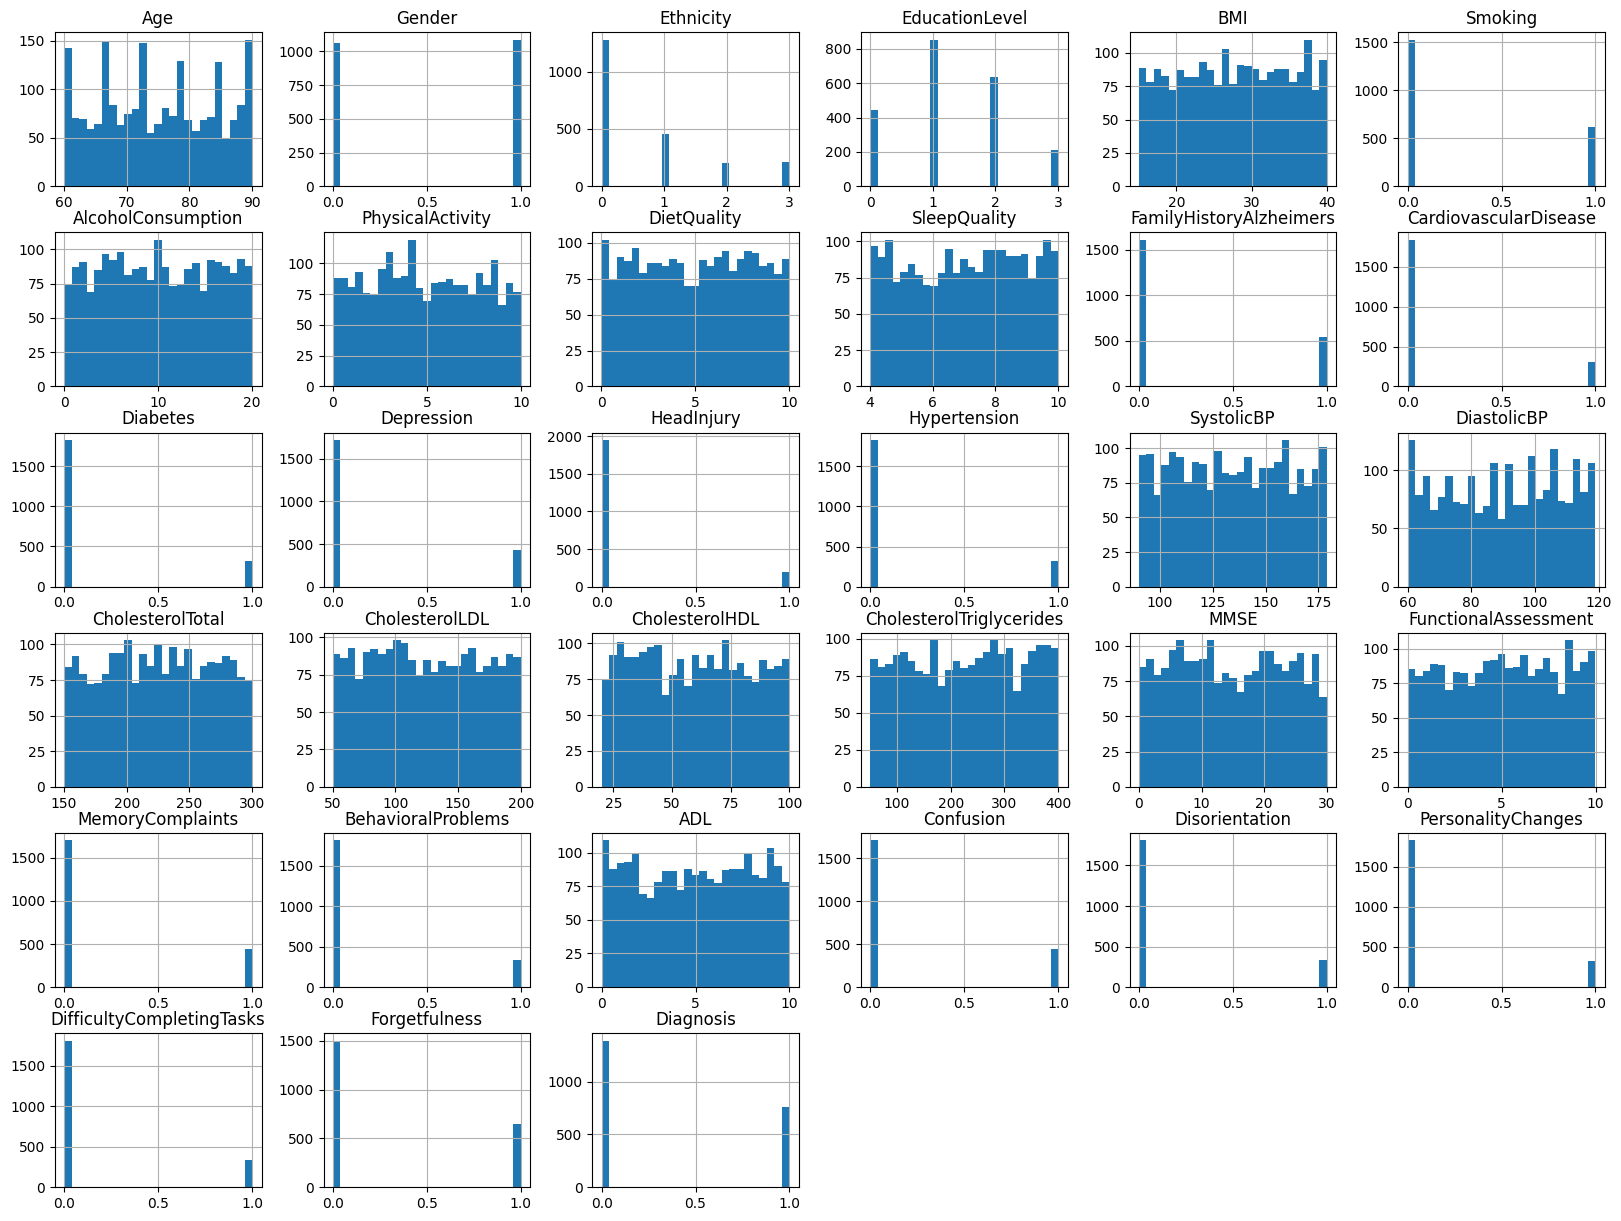

In [65]:
df.hist(bins=25, figsize=(20, 15))
plt.show()

<ul>
<li>Présence de six pics d'âge,</li>
<li>Répartition équitable selon le genre,</li>
<li>Sur-représentation des caucassiens,</li>
<li>Très faible représentation du plus haut niveau d'étude</li>
<li>Sur-représentation des fumeurs,</li>
<li>Répartition équitable de la consommation d'alcool, de l'activité physique, du régime alimentaire et de la qualité de sommeil, </li>
<li>Dans la grande majorité, il y a peu d'antécédent que ce soit alzheimer, ou autre maladie,</li>
<li>Sur les tests, assez bonne répartition des patients,</li>
<li>Pour les observations, dans la majorités, ceux ne présentant aucun symptome sont majoritaire.</li>
</ul>

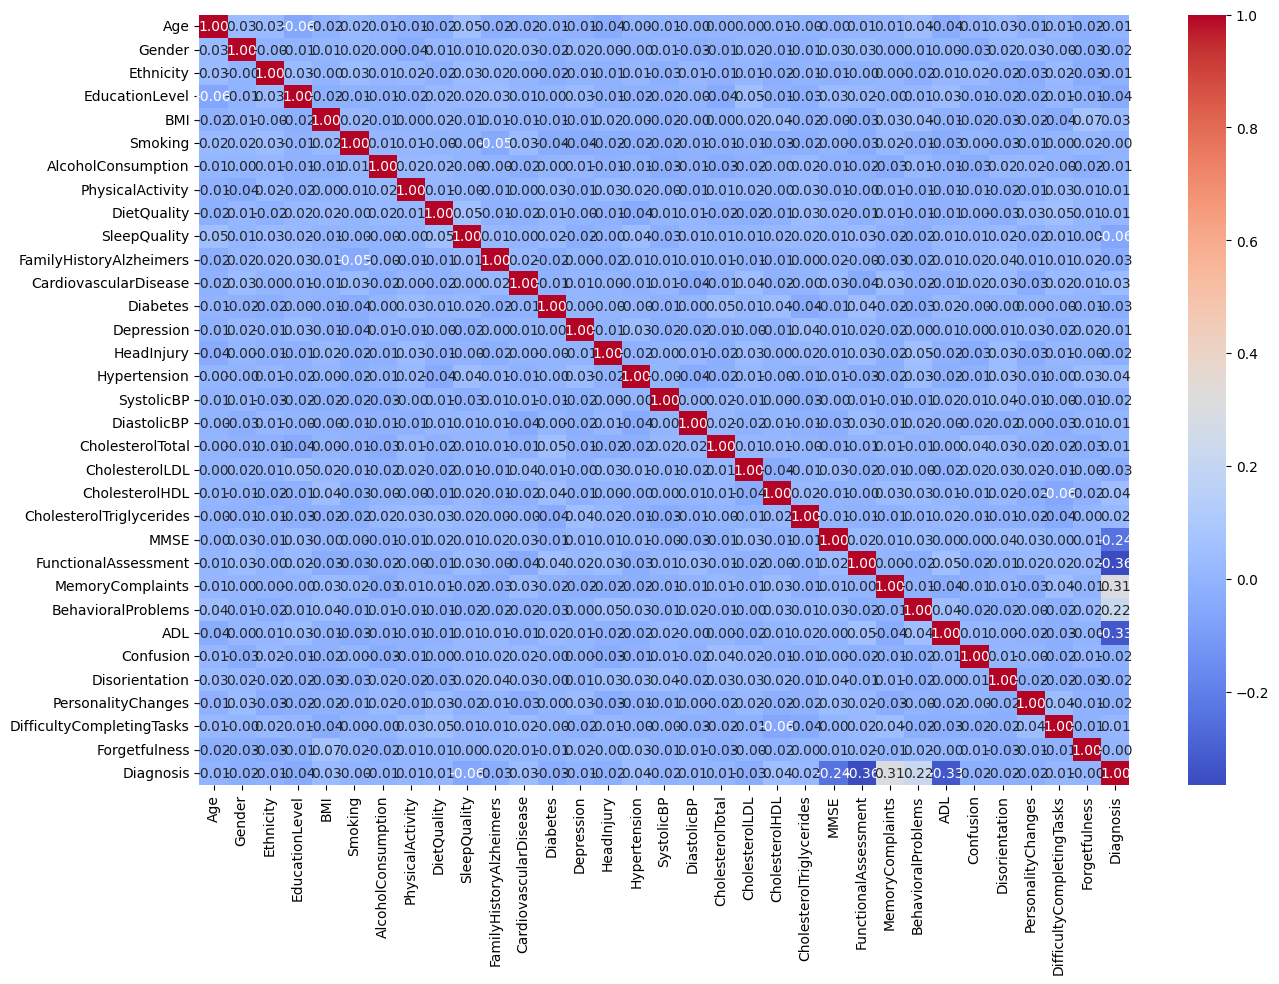

In [66]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [67]:
# # création de nouvelles colonnes pour contenir les valeurs qualitatives
# df["GenderValue"] = df.Gender.replace(0, 'male').replace(1, 'female')
# df["EthnicityValue"] = df.Ethnicity.replace(0, 'Caucasian').replace(1, 'African American').replace(2, 'Asian').replace(3, 'Other')
# df["EducationLevelValue"] = df.EducationLevel.replace(0, 'None').replace(1, 'High School').replace(2, "Bachelor's").replace(3, "Higher")